## K-Means Clustering on Mall Customers Dataset

### Importing the Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

plt.rcParams["figure.figsize"] = (8, 6)

### Loading the Dataset

In [2]:
dataset = pd.read_csv("Mall_Customers.csv")

print(f"Dataset shape: {dataset.shape}")
print("\nFirst 5 rows:")
dataset.head()

Dataset shape: (200, 5)

First 5 rows:


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Basic Data Exploration

In [3]:
# Column information and summary statistics

print("Dataset Info:")
print(dataset.info())

print("\n" + "=" * 75 + "\n")

print("Summary Statistics:")
print(dataset.describe())

print("\n" + "=" * 75 + "\n")

# Checking for missing values

print("Missing Values:")
print(dataset.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


Summary Statistics:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.7500

### Selecting Features

In [4]:
X = dataset[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

X.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


### Exploratory Data Analysis

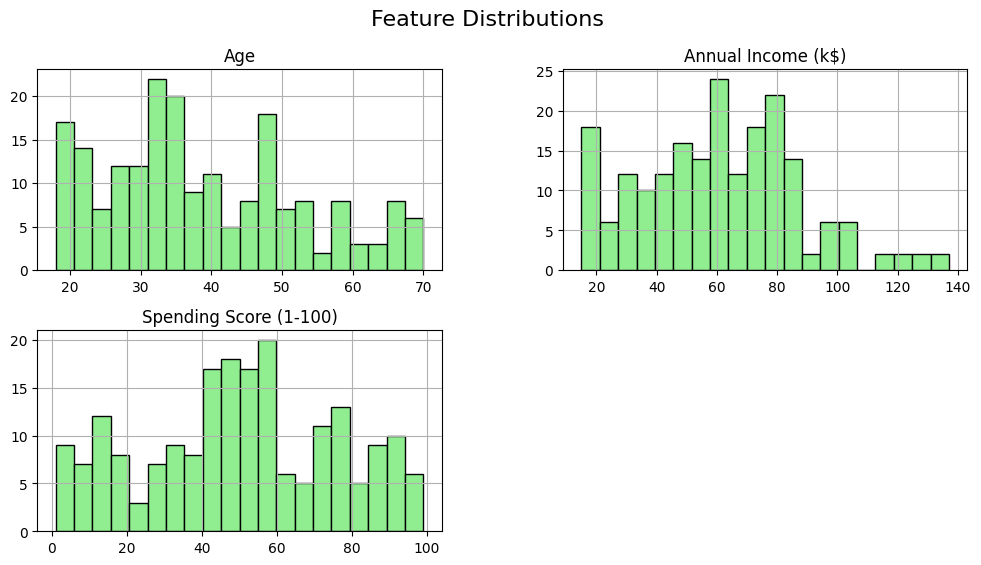

In [5]:
# Histograms of features

X.hist(bins = 20, figsize = (12, 6), color = "lightgreen", edgecolor = "black")
plt.suptitle("Feature Distributions", fontsize = 16)
plt.show()

### Finding the Optimal Number of Clusters

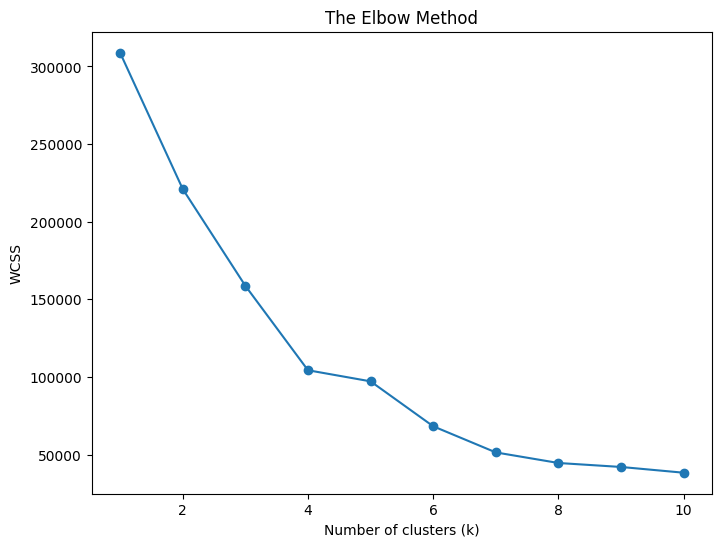

In [6]:
# Elbow method to find optimal k

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = "k-means++", random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker = 'o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

### Applying K-Means Clustering

In [7]:
# The elbow appears at k = 4 in the plot

k = 4
kmeans = KMeans(n_clusters = k, init = "k-means++", random_state = 42)
dataset['Cluster'] = kmeans.fit_predict(X)

dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,0
3,4,Female,23,16,77,2
4,5,Female,31,17,40,0


### Visualizing the Clusters

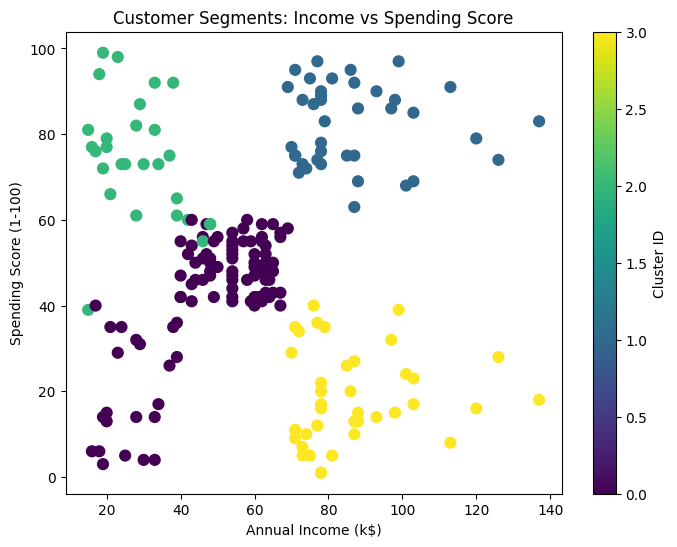

In [8]:
# Scatter Plot: Annual Income vs Spending Score

plt.scatter(X["Annual Income (k$)"], X["Spending Score (1-100)"], c = dataset['Cluster'], cmap = 'viridis', s = 60)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments: Income vs Spending Score')
plt.colorbar(label = 'Cluster ID')
plt.show()

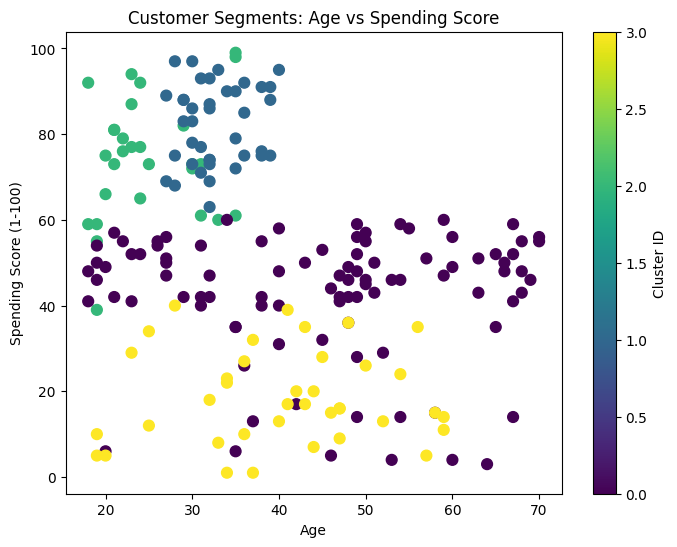

In [9]:
# Scatter Plot: Age vs Spending Score

plt.scatter(X["Age"], X["Spending Score (1-100)"], c = dataset['Cluster'], cmap = 'viridis', s = 60)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments: Age vs Spending Score')
plt.colorbar(label = 'Cluster ID')
plt.show()

### Interpretation of Clusters
- Cluster 0 (Purple):
      Customers in this group are spread across a wide range of ages and annual incomes but tend to have intermediate spending scores.

- Cluster 1 (Blue):
      These customers generally have higher spending scores. Many have medium to high annual incomes and are of varying ages.

- Cluster 2 (Green):
      This segment includes mainly younger customers with low to medium annual incomes and high spending scores.

- Cluster 3 (Yellow):
      In this segment, customers typically have high annual income but lower spending scores. It includes a variety of ages, having spending scores
      towards the lower end of the scale.